# ****Predict Multi Cyberbullying Tweets with Multiclassifier****

This project aims to predict cyberbullying tweets using the Support Vector Machine classifier, multinomial Naive Bayes classifier, and Logistic Regression classifier. There are six types of bullying used: not bullying, gender, ethnicity, age, religion, and others cyberbullying. In achieving the goal, the steps that will carry out are as follows.
## Contents
<a href='#1'>1. Import Library </a> <br>
<a href='#2'>2. Dataset </a> <br>
<a href='#3'>3. Data Preprocessing </a> <br>
<a href='#4'>4. Data Visualization </a> <br>
<a href='#5'>5. Spliting Data </a> <br>
<a href='#6'>6. Features Extractions </a> <br>
<a href='#6'>7. Classification </a> <br>
<a href='#7'>8. Evaluation </a> <br>
<a href='#8'>9. Conclusion </a> <br>


# <a id='1'> 1. Import Library</a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
from textblob import TextBlob
from nltk.corpus import wordnet
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC ,SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

plt.style.use('fivethirtyeight')

/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv


 # <a id='2'> 2. Dataset</a>

In [2]:
#get the data
df =  pd.read_csv('../input/cyberbullying-classification/cyberbullying_tweets.csv')

#show the top 5 data
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


 # <a id='3'> 3.Data Preprocessing </a>

### Cleaning the data

In [4]:
stemmer = SnowballStemmer("english")
lematizer=WordNetLemmatizer()

from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will'])

def lower(text):
    return text.lower()

def remove_hashtag(text):
    return re.sub("#[A-Za-z0-9_]+", ' ', text)

def remove_twitter(text):
    return re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in 
                     str(text).split() if word not in STOPWORDS])

def stemming(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

def cleanTxt(text):
    text = lower(text)
    text = remove_hashtag(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    text = stemming(text)
    text = lemmatizer_words(text)
    return text

#cleaning the text
df['tweet_clean'] = df['tweet_text'].apply(cleanTxt)

#show the clean text
df.head()

,tweet_text,cyberbullying_type,tweet_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilici
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account islam lie


In [5]:
df.shape
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

The dataset used contains 47692 rows, where the distribution of data for each type of cyberbullying is balanced. However, it is necessary to check whether there are duplicated tweets.

In [6]:
df["tweet_clean"].duplicated().sum()

3018

In [7]:
df.drop_duplicates("tweet_clean", inplace=True)

In [8]:
df.cyberbullying_type.value_counts()

religion               7941
age                    7865
ethnicity              7777
not_cyberbullying      7671
gender                 7595
other_cyberbullying    5825
Name: cyberbullying_type, dtype: int64

There are 3018 duplicated data, and after remove the duplicated data, the most duplicate data is in others cyberbullying.

# <a id='4'> 4. Data Visualization</a>

**Top 20 on Cyberbullying tweet**

In [9]:
df['tweet_list'] = df['tweet_clean'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['tweet_list'] for item in sublist])
tweet_list1 = pd.DataFrame(top.most_common(20))
tweet_list1.columns = ['Words','Count']
tweet_list1.style.background_gradient(cmap='Greens')

,Words,Count
0,bulli,11063
1,school,9152
2,fuck,7806
3,nigger,5615
4,girl,5523
5,joke,5456
6,dumb,5239
7,high,5178
8,muslim,4929
9,peopl,4842


In [10]:
figure = px.bar(tweet_list1, x="Count", y="Words", title='Top 20 words in cyberbullying tweet', orientation='h', 
             width=700, height=700,color='Words')
figure.show()

**Top 20 in type of cyberbullying tweet**

In [11]:
not_cyberbullying_type = df[df['cyberbullying_type']=='not_cyberbullying']
gender_type = df[df['cyberbullying_type']=='gender']
religion_type = df[df['cyberbullying_type']=='religion']
other_cyberbullying_type = df[df['cyberbullying_type']=='other_cyberbullying']
age_type = df[df['cyberbullying_type']=='age']
ethnicity_type = df[df['cyberbullying_type']=='ethnicity']

In [12]:
#Top 20 Words in not cyberbullying Tweet
top20 = Counter([item for sublist in not_cyberbullying_type['tweet_list'] for item in sublist])
type_nc = pd.DataFrame(top20.most_common(20))
type_nc.columns = ['Top of Words','Count']
type_nc.style.background_gradient(cmap='Greens')

,Top of Words,Count
0,bulli,1130
1,go,394
2,school,374
3,peopl,273
4,one,269
5,think,242
6,know,237
7,time,229
8,make,220
9,now,211


In [13]:
nc_fig = px.bar(type_nc, x="Count", y="Top of Words", title='Top 20 Words in not cyberbullying Tweet', orientation='h', 
             width=700, height=700,color='Top of Words')
nc_fig.show()

In [14]:
#Top 20 Words in Gender cyberbullying Tweet
top20_gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
type_g = pd.DataFrame(top20_gender.most_common(20))
type_g.columns = ['Top of Words','Count']
type_g.style.background_gradient(cmap='Greens')

,Top of Words,Count
0,joke,5227
1,rape,4214
2,gay,3988
3,call,1411
4,make,1288
5,woman,1203
6,bitch,1160
7,femal,1133
8,peopl,1001
9,sexist,973


In [15]:
g_fig = px.bar(type_g, x="Count", y="Top of Words", title='Top 20 Words in Gender Cyberbullying Tweet', orientation='h', 
             width=700, height=700,color='Top of Words')
g_fig.show()

In [16]:
#Top 20 Words in religion cyberbullying Tweet
top20_r = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
type_r = pd.DataFrame(top20_r.most_common(20))
type_r.columns = ['Top of Words','Count']
type_r.style.background_gradient(cmap='Greens')

,Top of Words,Count
0,muslim,4802
1,idiot,3109
2,islam,2363
3,christian,2164
4,terrorist,1400
5,right,1332
6,woman,1263
7,support,1259
8,terror,1241
9,radic,1118


In [17]:
r_fig = px.bar(type_r, x="Count", y="Top of Words", title='Top 20 Words in Religion Cyberbullying Tweet', orientation='h', 
             width=700, height=700,color='Top of Words')
r_fig.show()

In [18]:
#Top 20 Words in others cyberbullying Tweet
top20_o = Counter([item for sublist in other_cyberbullying_type['tweet_list'] for item in sublist])
type_o = pd.DataFrame(top20_o.most_common(20))
type_o.columns = ['Top of Words','Count']
type_o.style.background_gradient(cmap='Greens')

,Top of Words,Count
0,bulli,899
1,fuck,514
2,peopl,354
3,go,277
4,idiot,265
5,know,245
6,think,239
7,make,216
8,one,209
9,time,208


In [19]:
o_fig = px.bar(type_o, x="Count", y="Top of Words", title='Top 20 Words in Other Cyberbullying Tweet', orientation='h', 
             width=700, height=700,color='Top of Words')
o_fig.show()

In [20]:
#Top 20 Words in Age Cyberbullying Tweet
top20_a = Counter([item for sublist in age_type['tweet_list'] for item in sublist])
type_a = pd.DataFrame(top20_a.most_common(20))
type_a.columns = ['Top of Words','Count']
type_a.style.background_gradient(cmap='Greens')

,Top of Words,Count
0,bulli,8942
1,school,8523
2,high,4996
3,girl,4643
4,one,1051
5,peopl,935
6,now,913
7,got,818
8,kid,817
9,middl,784


In [21]:
a_fig = px.bar(type_a, x="Count", y="Top of Words", title='Top 20 Words in Age cyberbullying Tweet', orientation='h', 
             width=700, height=700,color='Top of Words')
a_fig.show()

In [22]:
#Top 20 Words in Ethnicity Cyberbullying Tweet
top20_e = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
type_e = pd.DataFrame(top20_e.most_common(20))
type_e.columns = ['Top of Words','Count']
type_e.style.background_gradient(cmap='Greens')

,Top of Words,Count
0,fuck,5989
1,nigger,5611
2,dumb,5063
3,as,2250
4,black,2183
5,white,1591
6,call,1392
7,peopl,1190
8,obama,1086
9,one,1082


In [23]:
e_fig = px.bar(type_e, x="Count", y="Top of Words", title='Top 20 Words in Ethnicity Cyberbullying Tweet', orientation='h', 
             width=700, height=700,color='Top of Words')
e_fig.show()

 # <a id='5'> 5. Spliting the data</a>

In [24]:
labels = df['cyberbullying_type'].tolist()
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [25]:
ClassIDMap = {'not_cyberbullying': 1, 'gender':2, 
              'religion':3, 'other_cyberbullying': 4, 
              'age': 5, 'ethnicity': 6 }
ClassIDMap

{'not_cyberbullying': 1,
 'gender': 2,
 'religion': 3,
 'other_cyberbullying': 4,
 'age': 5,
 'ethnicity': 6}

In [26]:
corpus, target_labels, target_names = (df['tweet_clean'], 
                                       [ClassIDMap[label] for 
                                        label in df['cyberbullying_type']], 
                                       df['cyberbullying_type'])

df = pd.DataFrame({'tweet text': corpus, 'cyberbullying Label': 
                        target_labels, 'cyberbulying Name': target_names})

In [27]:
df

,tweet text,cyberbullying Label,cyberbulying Name
0,word food crapilici,1,not_cyberbullying
1,white,1,not_cyberbullying
2,classi whore red velvet cupcak,1,not_cyberbullying
3,meh thank head concern anoth angri dude twitter,1,not_cyberbullying
4,isi account pretend kurdish account islam lie,1,not_cyberbullying
...,...,...,...
47687,black ppl expect anyth depend anyth yet free p...,6,ethnicity
47688,turner withhold disappoint turner call court a...,6,ethnicity
47689,swear god dumb nigger bitch got bleach hair re...,6,ethnicity
47690,yea fuck therealexel your nigger fuck unfollow...,6,ethnicity


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44674 entries, 0 to 47691
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet text           44674 non-null  object
 1   cyberbullying Label  44674 non-null  int64 
 2   cyberbulying Name    44674 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Spliting data**

In [29]:
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names =\
                                 train_test_split(np.array(df['tweet text']), np.array(df['cyberbullying Label']),
                                                       np.array(df['cyberbulying Name']), test_size=0.33, random_state=42)

train_corpus.shape, test_corpus.shape

((29931,), (14743,))

 # <a id='6'> 6. Features Exctractions</a>

In [30]:
# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.00002, max_df=0.6)
tv_train_features = tv.fit_transform(train_corpus.astype('U'))

# transform test articles into features
tv_test_features = tv.transform(test_corpus.astype('U'))

print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (29931, 28475)  Test features shape: (14743, 28475)


 # <a id='7'> 7. Classification</a>

**Support Vector Machine classifier**

In [31]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('svm', LinearSVC(random_state=42))])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 1)],
              'svm__C': [1e-5, 1e-4, 1e-2, 1e-1, 1]
}

gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=2)
gs_svm = gs_svm.fit(train_corpus.astype('U'), train_label_names)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.4s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.4s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................
[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.0s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................
[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   0.9s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................
[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   0.9s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................
[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.3s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................
[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.4s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................
[CV] .......... svm__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.3s
[CV] svm__C=1e-05, tfidf__ngram_range=(1, 1) .........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.7s finished


In [32]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer()),
  ('svm', LinearSVC(C=1, random_state=42))],
 'verbose': False,
 'tfidf': TfidfVectorizer(),
 'svm': LinearSVC(C=1, random_state=42),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'svm__C': 1,
 'svm__class_weight': None,
 'svm__dual': True,
 'svm__fit_intercept': True,
 'svm__intercept_scaling': 1,
 'svm__loss': 'squared_hinge',
 'svm__max_iter': 1000,
 'svm__multi_class': 'ovr',


In [33]:
best_svm_test_score = gs_svm.score(test_corpus.astype('U'), test_label_names)
print('Test Accuracy :', best_svm_test_score)

Test Accuracy : 0.8274435325239097


**Multinomial Naive Bayes Classifier**

In [34]:
mnb_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('mnb', MultinomialNB())
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'mnb__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]
}

gs_mnb = GridSearchCV(mnb_pipeline, param_grid, cv=5, verbose=2)
gs_mnb = gs_mnb.fit(train_corpus, train_label_names)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.6s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.5s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.5s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.5s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.8s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 2), total=   2.2s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 2), total=   1.7s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 2), total=   1.6s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


In [35]:
gs_mnb.best_estimator_.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
  ('mnb', MultinomialNB(alpha=0.01))],
 'verbose': False,
 'tfidf': TfidfVectorizer(ngram_range=(1, 2)),
 'mnb': MultinomialNB(alpha=0.01),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 2),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'mnb__alpha': 0.01,
 'mnb__class_prior': None,
 'mnb__fit_prior': True}

In [36]:
best_mnb_test_score = gs_mnb.score(test_corpus, test_label_names)
print('Test Accuracy :', best_mnb_test_score)

Test Accuracy : 0.754120599606593


**Logistic Regression Classifier**

In [37]:
lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('lr', LogisticRegression(penalty='l2', max_iter=100, random_state=42))
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'lr__C': [1e-5, 1e-4, 1e-2, 1e-1, 1]
}

gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=2)
gs_lr = gs_lr.fit(train_corpus, train_label_names)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 1) ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.3s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 1) ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.3s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.3s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.1s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 1), total=   1.3s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 2), total=   5.9s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 2), total=   5.9s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... lr__C=1e-05, tfidf__ngram_range=(1, 2), total=   6.2s
[CV] lr__C=1e-05, tfidf__ngram_range=(1, 2) ..........................
[CV] .

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   4.2s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   5.0s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   4.7s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   5.5s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   5.5s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=  22.9s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=  25.6s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=  23.4s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=  24.5s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/o

[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=  22.9s


In [38]:
gs_lr.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(C=0.1, random_state=42))])

In [39]:
best_lr_test_score = gs_lr.score(test_corpus, test_label_names)
print('Test Accuracy :', best_lr_test_score)

Test Accuracy : 0.8024147052838635


 # <a id='8'> 8. Evaluation</a>

**Support Vector Machine classifier**

In [40]:
svm_results = gs_svm.cv_results_
results_df = pd.DataFrame({'rank': svm_results['rank_test_score'],
                           'params': svm_results['params'], 
                           'cv score (mean)': svm_results['mean_test_score'], 
                           'cv score (std)': svm_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
8,1,"{'svm__C': 1, 'tfidf__ngram_range': (1, 1)}",0.830076,0.006461
9,1,"{'svm__C': 1, 'tfidf__ngram_range': (1, 1)}",0.830076,0.006461
6,3,"{'svm__C': 0.1, 'tfidf__ngram_range': (1, 1)}",0.829541,0.006086
7,3,"{'svm__C': 0.1, 'tfidf__ngram_range': (1, 1)}",0.829541,0.006086
4,5,"{'svm__C': 0.01, 'tfidf__ngram_range': (1, 1)}",0.789382,0.006630
5,5,"{'svm__C': 0.01, 'tfidf__ngram_range': (1, 1)}",0.789382,0.006630
2,7,"{'svm__C': 0.0001, 'tfidf__ngram_range': (1, 1)}",0.603588,0.004264
3,7,"{'svm__C': 0.0001, 'tfidf__ngram_range': (1, 1)}",0.603588,0.004264
0,9,"{'svm__C': 1e-05, 'tfidf__ngram_range': (1, 1)}",0.546724,0.003896
1,9,"{'svm__C': 1e-05, 'tfidf__ngram_range': (1, 1)}",0.546724,0.003896


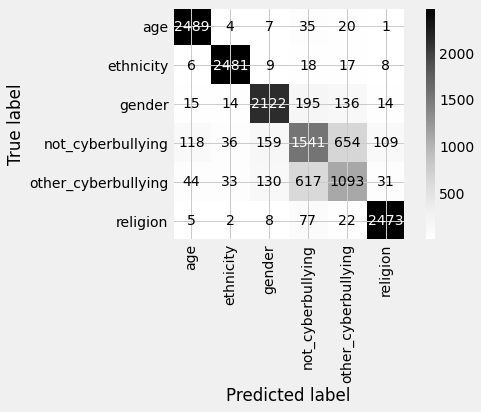

In [41]:
svm_predictions = gs_svm.predict(test_corpus.astype('U'))

plot_confusion_matrix(estimator=gs_svm, X=test_corpus, y_true=test_label_names, 
                      xticks_rotation='vertical', cmap='Greys', ax=None, include_values=True)

In [42]:
print(classification_report(test_label_names, svm_predictions, target_names=list(set(test_label_names))))

                     precision    recall  f1-score   support

           religion       0.93      0.97      0.95      2556
          ethnicity       0.97      0.98      0.97      2539
other_cyberbullying       0.87      0.85      0.86      2496
  not_cyberbullying       0.62      0.59      0.60      2617
                age       0.56      0.56      0.56      1948
             gender       0.94      0.96      0.95      2587

           accuracy                           0.83     14743
          macro avg       0.81      0.82      0.82     14743
       weighted avg       0.82      0.83      0.83     14743



**Multinomial Naive Bayes**

In [43]:
mnb_results = gs_mnb.cv_results_
results_df = pd.DataFrame({'rank': mnb_results['rank_test_score'],
                           'params': mnb_results['params'], 
                           'mnb score (mean)': mnb_results['mean_test_score'], 
                           'mnb score (std)': mnb_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,mnb score (mean),mnb score (std)
5,1,"{'mnb__alpha': 0.01, 'tfidf__ngram_range': (1, 2)}",0.759380,0.007268
7,2,"{'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}",0.755237,0.007539
3,3,"{'mnb__alpha': 0.0001, 'tfidf__ngram_range': (1, 2)}",0.742040,0.006556
6,4,"{'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 1)}",0.740436,0.005140
1,5,"{'mnb__alpha': 1e-05, 'tfidf__ngram_range': (1, 2)}",0.738365,0.006686
8,6,"{'mnb__alpha': 1, 'tfidf__ngram_range': (1, 1)}",0.722729,0.006270
9,7,"{'mnb__alpha': 1, 'tfidf__ngram_range': (1, 2)}",0.720156,0.005813
4,8,"{'mnb__alpha': 0.01, 'tfidf__ngram_range': (1, 1)}",0.717918,0.005502
2,9,"{'mnb__alpha': 0.0001, 'tfidf__ngram_range': (1, 1)}",0.672513,0.004339
0,10,"{'mnb__alpha': 1e-05, 'tfidf__ngram_range': (1, 1)}",0.659016,0.004061


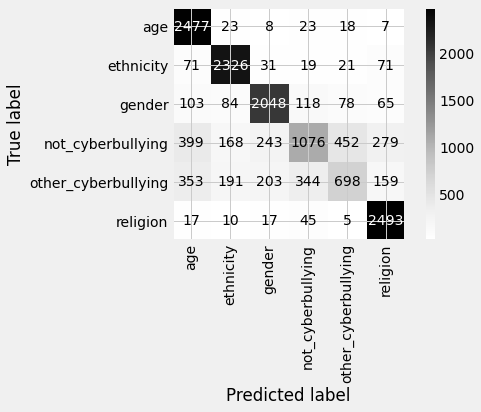

In [44]:
mnb_predictions = gs_mnb.predict(test_corpus.astype('U'))

plot_confusion_matrix(estimator=gs_mnb, X=test_corpus, y_true=test_label_names, 
                      xticks_rotation='vertical', cmap='Greys', ax=None, include_values=True)

In [45]:
print(classification_report(test_label_names, mnb_predictions, target_names=list(set(test_label_names))))

                     precision    recall  f1-score   support

           religion       0.72      0.97      0.83      2556
          ethnicity       0.83      0.92      0.87      2539
other_cyberbullying       0.80      0.82      0.81      2496
  not_cyberbullying       0.66      0.41      0.51      2617
                age       0.55      0.36      0.43      1948
             gender       0.81      0.96      0.88      2587

           accuracy                           0.75     14743
          macro avg       0.73      0.74      0.72     14743
       weighted avg       0.74      0.75      0.73     14743



****Logistic Regression Classifier****

In [46]:
lr_results = gs_lr.cv_results_
results_df = pd.DataFrame({'rank': lr_results['rank_test_score'],
                           'params': lr_results['params'], 
                           'lr score (mean)': lr_results['mean_test_score'], 
                           'lr score (std)': lr_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,lr score (mean),lr score (std)
6,1,"{'lr__C': 0.1, 'tfidf__ngram_range': (1, 1)}",0.797000,0.007541
7,2,"{'lr__C': 0.1, 'tfidf__ngram_range': (1, 2)}",0.784604,0.006408
4,3,"{'lr__C': 0.01, 'tfidf__ngram_range': (1, 1)}",0.752230,0.005464
5,4,"{'lr__C': 0.01, 'tfidf__ngram_range': (1, 2)}",0.705790,0.007016
2,5,"{'lr__C': 0.0001, 'tfidf__ngram_range': (1, 1)}",0.419665,0.003172
3,6,"{'lr__C': 0.0001, 'tfidf__ngram_range': (1, 2)}",0.305603,0.001208
0,7,"{'lr__C': 1e-05, 'tfidf__ngram_range': (1, 1)}",0.179012,0.000078
1,8,"{'lr__C': 1e-05, 'tfidf__ngram_range': (1, 2)}",0.178878,0.000065
8,9,"{'lr__C': 1, 'tfidf__ngram_range': (1, 1)}",NaN,NaN
9,10,"{'lr__C': 1, 'tfidf__ngram_range': (1, 2)}",NaN,NaN


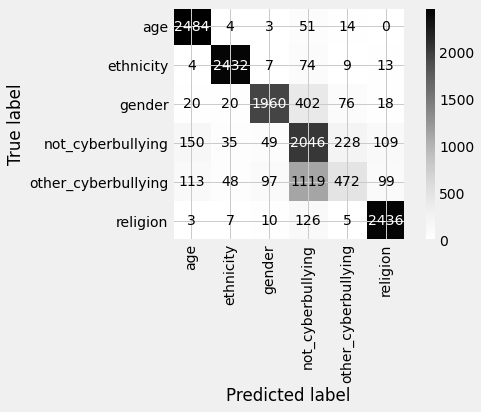

In [47]:
lr_predictions = gs_lr.predict(test_corpus.astype('U'))

plot_confusion_matrix(estimator=gs_lr, X=test_corpus, y_true=test_label_names, 
                      xticks_rotation='vertical', cmap='Greys', ax=None, include_values=True)

In [48]:
print(classification_report(test_label_names, lr_predictions, target_names=list(set(test_label_names))))

                     precision    recall  f1-score   support

           religion       0.90      0.97      0.93      2556
          ethnicity       0.96      0.96      0.96      2539
other_cyberbullying       0.92      0.79      0.85      2496
  not_cyberbullying       0.54      0.78      0.64      2617
                age       0.59      0.24      0.34      1948
             gender       0.91      0.94      0.93      2587

           accuracy                           0.80     14743
          macro avg       0.80      0.78      0.77     14743
       weighted avg       0.81      0.80      0.79     14743



 # <a id='9'> 9. Conclusion</a>

The support vector machine is the best machine learning model for predicting cyberbullying tweets. The accuracy obtained using the SVM model is about 83%, with a weighted average precision percentage of 82%. Even so, the sensitivity obtained is 83%. It means that about 17% of positive cases missed the model's predictions.